This notebook reproduces Figure S1 from **DeSalvio, N.D. and Rudolph, M.L. (2021). ''A Retrospective Analysis of b-value Changes Preceding Strong Earthquakes''**

Here, we generate synthetic *observations* consisting of sets of *foreshocks* and *mainshocks*. We then randomly generate *predictions* that include *foreshocks*, *mainshocks*, *insufficient data*, and *neutral* events. The *neutral* and *insufficient data* cases are assigned a default probability indicative of the rate of occurrence of foreshocks in observed seismicity.

The cell below introduces a function that calculates the Matthews Correlation Coefficient for arbitrary vectors of predictions P and observations S.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_MatthewsC(P,S):
    """calculate the matthews correlation coefficient.
    Expects a vector of predictions P and observations S.
    The values in P and S.
    P=0 means no larger earthquake earthquake
    P=1 means that we predict a larger earthquake
    P=.05 means 1/20 chance of a larger earthquake"""
    assert(np.shape(S) == np.shape(P))
    sbar = np.mean(S)
    pbar = np.mean(P)
    if pbar == 0 or sbar == 0 or np.std(S) == 0 or np.std(P) == 0:
        return 0
    numerator = np.sum((S-sbar)*(P-pbar))
    denominator = (np.sum((S-sbar)**2)*np.sum((P-pbar)**2))**0.5
    C = numerator/denominator
    return C

# M>6 events

We consider samples of 22 events. Of the 22 events, we have 11 'insufficient data', 1 true prediction, 7 true non-predictions, and 3 neutral predictions. There were no false positives or negatives in the best-performing case.

In [2]:
# Distribution of outcomes for the M6+ events
nevent = 22;

best_MCC_M6 = 0.524 # best value of MCC from Table S1
default_mainshock_probability = 0.90
P = np.concatenate((default_mainshock_probability*np.ones(11,),
                    0*np.ones(1,),
                    1*np.ones(9,),
                    default_mainshock_probability*np.ones(1,)))

# Calculate correlation coefficients for M6+ events
prob_true = default_mainshock_probability
nreal = 1000000

all_S6 = []
all_C6 = []
ntp_C6 = [] # number of true positive outcomes
for i in range(nreal):
    all_S6.append( 1.0*(np.random.rand(nevent) < prob_true) )
for S in all_S6:
    all_C6.append( calculate_MatthewsC(P,S) )
    ntp_C6.append(np.sum(np.logical_and(P==0,S==0)))
all_C6 = np.array(all_C6)
ntp_C6 = np.array(ntp_C6)

In [3]:
# Distribution of outcomes for the M5+ events
nreal = nreal+1
nevent = 107;

best_MCC_M5 = 0.333 # best value of MCC from Table S2
# 96 insufficient data, 2 (true) predictions, 4 true non-prediction, 5 neutral predictions, no false positives or negatives.
P = np.concatenate((default_mainshock_probability*np.ones(103,),
                    0*np.ones(2,),
                    1*np.ones(2,),
                    default_mainshock_probability*np.ones(0,)))

# Calculate correlation coefficients for M6+ events
prob_true = default_mainshock_probability

all_S5 = []
all_C5 = []
ntp_C5 = [] # number of true positive outcomes
for i in range(nreal):
    all_S5.append( 1.0*(np.random.rand(nevent) < prob_true) )
for S in all_S5:
    all_C5.append( calculate_MatthewsC(P,S) )
    ntp_C5.append(np.sum(np.logical_and(P==0,S==0)))
all_C5 = np.array(all_C5)
ntp_C5 = np.array(ntp_C5)

# Make a figure


Fraction of M6+ outcomes with 1+ true positives and equal or larger MCC:  0.48491839784935453
Fraction of M5+ outcomes with 1+ true positives and equal or larger MCC:  0.04799334098979022
Fraction of M5+ outcomes with 2+ true positives and equal or larger MCC:  0.8109152139461173


10096

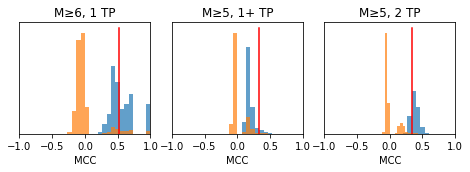

In [4]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(6.5,2.5))
bins=np.linspace(-1,1,31)

# Plot a histogram for the M6 outcomes, and for M6, requiring 1+ correct prediction
ax1.hist(all_C6[ntp_C6>0],bins,density=True,alpha=0.7)
ax1.hist(all_C6,bins,density=True,alpha=0.7)

ax1.plot([best_MCC_M6,best_MCC_M6],ax1.get_ylim(),'r')
ax1.set_xlim([-1,1])
ax1.set_xlabel('MCC')
ax1.set_title('M≥6, 1 TP')
ax1.set_yticks([])

# Plot a histogram for the M5 outcomes, and for M5, requiring 1+ correct prediction
ax2.hist(all_C5[ntp_C5>0],bins,density=True,alpha=0.7)
ax2.hist(all_C5,bins,density=True,alpha=0.7)

ax2.plot([best_MCC_M5,best_MCC_M5],ax2.get_ylim(),'r')
ax2.set_xlim([-1,1])
ax2.set_xlabel('MCC')
ax2.set_title('M≥5, 1+ TP')
ax2.set_yticks([])

# Plot a histogram for the M5 outcomes, and for M5, requiring 2 correct prediction
ax3.hist(all_C5[ntp_C5>1],bins,density=True,alpha=0.7)
ax3.hist(all_C5,21,density=True,alpha=0.7)

ax3.plot([best_MCC_M5,best_MCC_M5],ax3.get_ylim(),'r')
ax3.set_xlim([-1,1])
ax3.set_xlabel('MCC')
ax3.set_title('M≥5, 2 TP')
ax3.set_yticks([])

plt.tight_layout()
plt.savefig('mcc_histogram_figure.svg')

nzC6 = all_C6[ntp_C6>0]
print('Fraction of M6+ outcomes with 1+ true positives and equal or larger MCC: ',np.count_nonzero(nzC6 > best_MCC_M6)/len(nzC6))

nzC5 = all_C5[ntp_C5>0]
print('Fraction of M5+ outcomes with 1+ true positives and equal or larger MCC: ',np.count_nonzero(nzC5 > best_MCC_M5)/len(nzC5))

nzC5 = all_C5[ntp_C5>1]
print('Fraction of M5+ outcomes with 2+ true positives and equal or larger MCC: ',np.count_nonzero(nzC5 > best_MCC_M5)/len(nzC5))

np.sum(ntp_C5>1)